In [1]:
from scLENS import scLENS
import pandas as pd
import torch
import umap
import umap.plot

C:\Users\PAVILION\AppData\Roaming\Python\Python311\site-packages\umap\plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


Load the data to be used

In [2]:
df = pd.read_csv('Z8eq.csv.gz')
df

,cell,ENSG00000237683,Unknown,LINC01409,LINC00115,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,...,MT-ND6,MT-CYB,ENSG00000215750,ENSG00000215781,ENSG00000220023,ENSG00000212884,ENSG00000215615,ENSG00000215764,ENSG00000215700,ENSG00000215699
0,b.cells,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,b.cells,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3990,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3991,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3992,naive.t,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
y_true = df['cell']
df = df.drop('cell', axis=1)

scLENS enables GPU computation, implemented through pyTorch. Device can be specified in initiation

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
sclens = scLENS(device=device)

Data can be fed into the scLENS object in two ways: either through the preprocess() function, which preprocesses the data and saves the clean data; or feed it into the fit() or fit_transform() function, in which case the data will not be preprocessed

The preprocess() function does the following in order:
1) Remove cells expressing less than *min_genes_per_cell* genes, and genes expressed in less than *min_cells_per_gene* cells
2) L1 normalize along each cell
3) Log scale the data
4) Z-score normalization along each gene
5) L2 normalize along each cell

In [5]:
%%time
sclens.preprocess(df, min_genes_per_cell=200, min_cells_per_gene=15)

torch.Size([3994, 9651])
CPU times: total: 1.03 s
Wall time: 2.62 s


,0,1,2,3,4,5,6,7,8,9,...,9641,9642,9643,9644,9645,9646,9647,9648,9649,9650
0,-0.036393,-0.043881,-0.195708,-0.033588,-0.354887,-0.048850,-0.143164,-0.181294,-0.278050,-0.082262,...,0.252300,-0.417485,-0.174548,-1.153380,0.692321,-0.100603,-0.012324,-0.064843,-0.130810,-0.132295
1,-0.021894,-0.029042,-0.173975,-0.019216,-0.325925,-0.033785,-0.123817,-0.160215,-0.252578,-0.065681,...,-0.253501,-0.385681,-0.153776,2.201774,-0.587318,-0.083188,-0.354513,-0.049052,-0.112024,-0.113441
2,-0.059941,-0.068336,-0.238551,-0.056796,-0.417007,-0.073907,-0.179643,-0.222391,-0.330865,-0.111366,...,0.034330,0.965614,-0.214828,-0.473865,1.312416,-0.131927,0.002942,-0.091836,-0.165793,-0.167457
3,-0.076261,-0.081110,-0.179432,-0.074444,-0.282514,-0.084327,-0.145404,-0.170097,-0.232756,-0.105965,...,1.944483,3.276527,-0.165729,1.275373,0.802811,-0.117842,3.650913,-0.094684,-0.137404,-0.138366
4,-0.039332,-0.046227,-0.186032,-0.036749,-0.332607,-0.050802,-0.137649,-0.172760,-0.261855,-0.081569,...,0.650772,1.437485,-0.166548,0.513200,-0.584753,-0.098458,0.527897,-0.065529,-0.126273,-0.127640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,-0.065431,-0.072868,-0.223649,-0.062645,-0.381731,-0.077802,-0.171466,-0.209334,-0.305424,-0.110985,...,-0.288083,2.788354,-0.202635,0.689489,0.479812,-0.129199,-0.179572,-0.093685,-0.159198,-0.160672
3990,-0.047104,-0.055368,-0.222926,-0.044008,-0.398597,-0.060851,-0.164937,-0.207018,-0.313799,-0.097726,...,0.401081,-0.467681,-0.199574,-0.760889,-0.700796,-0.117966,0.313753,-0.078501,-0.151303,-0.152942
3991,-0.085975,-0.092869,-0.232643,-0.083393,-0.379186,-0.097443,-0.184270,-0.219373,-0.308449,-0.128203,...,0.534158,-0.436815,-0.213163,-0.270338,1.418774,-0.145088,-0.211362,-0.112166,-0.172897,-0.174264
3992,-0.037605,-0.044092,-0.175630,-0.035174,2.059003,-0.048397,-0.130107,-0.163142,-0.246969,-0.077344,...,-1.050889,-0.367771,-0.157298,-1.005329,-0.550774,-0.093234,0.296731,-0.062252,-0.119405,-0.120691


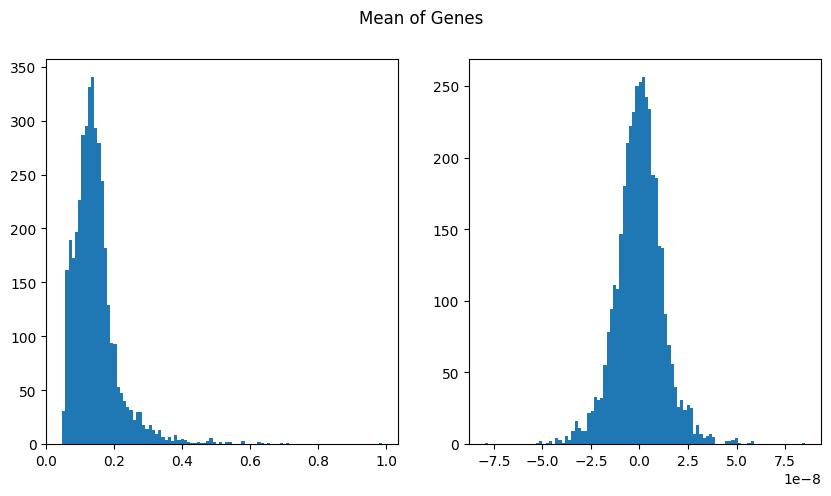

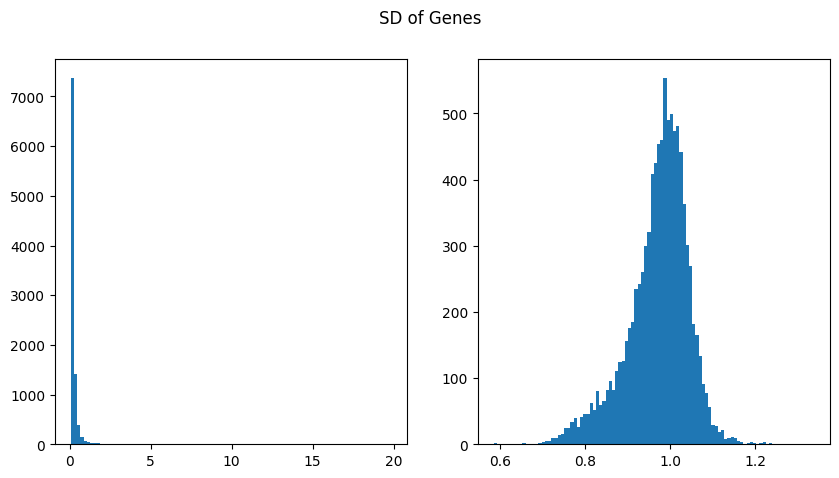

In [6]:
sclens.plot_preprocessing()

With fit_transform(), scLENS fits to the data, saving the robust components, and returns the projection of the training data to the robust components. For test data, the transform() function could be used, which projects the input data without fitting to it

scLENS adopts a modified version of PCA explained in https://arxiv.org/abs/1810.03602 and implemented in the Randomly python package (https://github.com/RabadanLab/randomly). The steps performed in Randomly can be outlined as:
1) Create randomized data matrix by permutating data points along cells
2) Perform PCA on the original and randomized data, creating two sets of principal components
3) Calculate the Marchenko-Pastur distribution and Tracy-Widom critical eigenvalue
4) Select principal components above the Tracy-Widom threshold, the signal components

scLENS builds on this method by selecting only the components robust from small perturbations among the signal components. scLENS does the following:
1) Perform PCA on the original data
2) Construct *n_rand_matrix* random binary matrices, each having *sparsity* sparsity
3) Create *n_rand_matrix* perturbed data matrices by adding the random binary matrices to the original data
4) Perform PCA on the perturbed data matrices
5) Calculate the correlation between the signal components found in the original data and the signal components found in the perturbed data
6) Select signal components with correlation above *threshold*, the robust components

Note that *sparsity* is automatically calculated by default. Specifying a number during initialization skips the sparsity calculation step

c:\Users\PAVILION\OneDrive\Documents\BIMAG\scLENS\PCA.py:157: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sns.distplot(self.L,


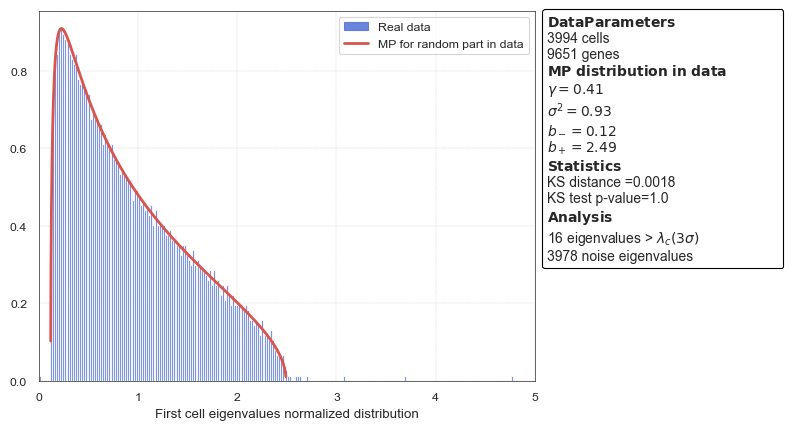

c:\Users\PAVILION\OneDrive\Documents\BIMAG\scLENS\scLENS.py:260: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_clean = torch.tensor(X).to(self.device, dtype=torch.float32)


CPU times: total: 36.3 s
Wall time: 1min 40s


In [7]:
%%time
X_transform = sclens.fit_transform(plot_mp=True)

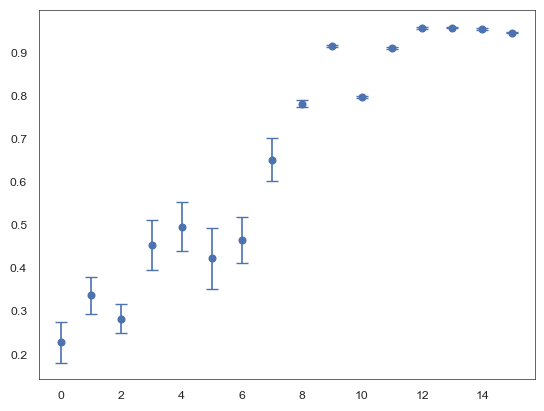

In [8]:
sclens.plot_robust_score()

In [9]:
sclens.sparsity

0.981

In [10]:
sclens.robust_components.shape

(3994, 9)

The projected data can be visualized in any mapping of your choice

<Axes: >

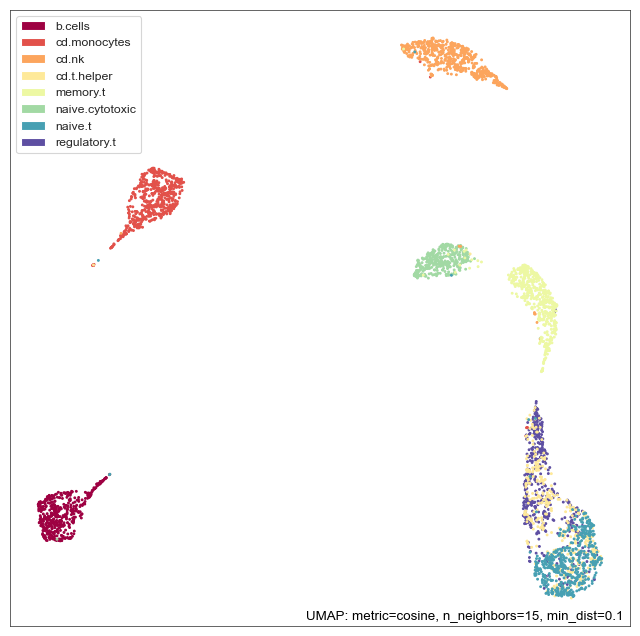

In [11]:
mapper = umap.UMAP(metric='cosine').fit(X_transform)
umap.plot.points(mapper, labels=y_true)

sclens.Clustering offers a clustering function, find_clusters(), as well as an automatic chooser for the resolution parameter, chooseR(), based on the R package https://github.com/rbpatt2019/chooseR. 

In [12]:
from Clustering import find_clusters, chooseR 

In [14]:
X_transform.shape

(3994, 9)

In [15]:
resolution = chooseR(X_transform, reps=5, n_jobs=-2) # Use all available CPU for parallel computation

MemoryError: Unable to allocate 77.9 MiB for an array with shape (3195, 3195) and data type int64

In [ ]:
clustering = find_clusters(X_transform, res=resolution)

In [ ]:
umap.plot.points(mapper, labels=clustering)